In [1]:
# Dependencies

import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

from config import api_key

In [2]:
headers = {'Authorization': 'Bearer %s' % api_key}

In [3]:
url='https://api.yelp.com/v3/businesses/search'
 
# paramaters
params = {'term':'music venue','location':'Denver','radius':20000,'limit':50}

In [4]:
response=requests.get(url, params=params, headers=headers).json()
 
# proceed only if the status code is 200
#print('The status code is {}'.format(response.status_code))

In [5]:
response['businesses'][1]

{'id': '_UXWmagvPB86UA3PE2revA',
 'alias': 'ogden-theatre-denver',
 'name': 'Ogden Theatre',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/i0dQa9VdDfKr9u1bAePcvg/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/ogden-theatre-denver?adjust_creative=wF1bldRCEuJWCI9AQjieGA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=wF1bldRCEuJWCI9AQjieGA',
 'review_count': 199,
 'categories': [{'alias': 'musicvenues', 'title': 'Music Venues'},
  {'alias': 'venues', 'title': 'Venues & Event Spaces'},
  {'alias': 'theater', 'title': 'Performing Arts'}],
 'rating': 3.5,
 'coordinates': {'latitude': 39.7402554155021, 'longitude': -104.975281194851},
 'transactions': [],
 'price': '$$',
 'location': {'address1': '935 E Colfax Ave',
  'address2': '',
  'address3': '',
  'city': 'Denver',
  'zip_code': '80218',
  'country': 'US',
  'state': 'CO',
  'display_address': ['935 E Colfax Ave', 'Denver, CO 80218']},
 'phone': '+13038321874',
 'display_phone': '(303) 832

In [6]:
response['businesses']

[{'id': '0IqSfcno328kCD374Q7R7g',
  'alias': 'your-moms-house-denver',
  'name': "Your Mom's House",
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/mMUnWRrb4k1qI7RL3iBgQg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/your-moms-house-denver?adjust_creative=wF1bldRCEuJWCI9AQjieGA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=wF1bldRCEuJWCI9AQjieGA',
  'review_count': 47,
  'categories': [{'alias': 'musicvenues', 'title': 'Music Venues'},
   {'alias': 'danceclubs', 'title': 'Dance Clubs'},
   {'alias': 'bars', 'title': 'Bars'}],
  'rating': 4.0,
  'coordinates': {'latitude': 39.7367329, 'longitude': -104.9795145},
  'transactions': [],
  'price': '$',
  'location': {'address1': '608 E 13th Ave',
   'address2': '',
   'address3': None,
   'city': 'Denver',
   'zip_code': '80203',
   'country': 'US',
   'state': 'CO',
   'display_address': ['608 E 13th Ave', 'Denver, CO 80203']},
  'phone': '+13038604516',
  'display_phone': '(303) 860-451

In [7]:
busId=[]
busName=[]
address=[]
phoneNum=[]
review_count=[]
rating=[]
priceLevel=[]
numOfCategories=[]
categories=[]
distance=[]
noPriceData=[]

for x in range(len(response['businesses'])):
    subList=[]
    for i in range(len(response['businesses'][x]['categories'])):
        subList.append(response['businesses'][x]['categories'][i]['title'])
    categories.append(subList)
    busId.append(response['businesses'][x]['id'])
    busName.append(response['businesses'][x]['name'])
    address.append(response['businesses'][x]['location']['display_address'])
    phoneNum.append(response['businesses'][x]['display_phone'])    
    numOfCategories.append(len(response['businesses'][x]['categories']))
    try:
        priceLevel.append(response['businesses'][x]['price'])    
    except:
        priceLevel.append('N/A')
        noPriceData.append(response['businesses'][x]['id'])
    try:
        review_count.append(response['businesses'][x]['review_count'])
        distance.append(response['businesses'][x]['distance'])
        rating.append(response['businesses'][x]['rating'])
    except:
        print(f"Could not access all the information for {response['businesses'][x]['name']}")
        del categories[-1]
        del busId[-1]
        del busName[-1]
        del address[-1]
        del phoneNum[-1]
        del numOfCategories[-1]

In [8]:
businessDataDF=pd.DataFrame({"ID":busId,"Name":busName,"Address":address,"Phone Number":phoneNum,"Review Count":review_count,
                            "Rating":rating,"Price Level":priceLevel,"Number of Categories":numOfCategories,
                            "Categories":categories,"Distance from Denver":distance})
businessDataDF

,ID,Name,Address,Phone Number,Review Count,Rating,Price Level,Number of Categories,Categories,Distance from Denver
0,0IqSfcno328kCD374Q7R7g,Your Mom's House,"[608 E 13th Ave, Denver, CO 80203]",(303) 860-4516,47,4.0,$,3,"[Music Venues, Dance Clubs, Bars]",803.903839
1,_UXWmagvPB86UA3PE2revA,Ogden Theatre,"[935 E Colfax Ave, Denver, CO 80218]",(303) 832-1874,199,3.5,$$,3,"[Music Venues, Venues & Event Spaces, Performi...",679.836663
2,oAWkAw_C5ByIZQubcVgIBw,Bluebird Theater,"[3317 E Colfax Ave, Denver, CO 80206]",(303) 377-1666,173,4.0,$$,2,"[Performing Arts, Music Venues]",1947.117349
3,8WGzLAv1Mu_R9amiMz6RuQ,The Soiled Dove Underground,"[7401 E 1st Ave, Denver, CO 80230]",(303) 366-0007,89,4.0,$$,2,"[Music Venues, Venues & Event Spaces]",6189.800684
4,m6hFStjFi3KfRXf4v777Cw,Mission Ballroom,"[4242 Wynkoop St, Denver, CO 80216]",,43,4.0,N/A,1,[Music Venues],4524.650241
5,TYf0Pii-XhKvwwnOhVo28g,Fillmore Auditorium,"[1510 Clarkson St, Denver, CO 80218]",(303) 837-0360,180,3.0,$$,2,"[Music Venues, Performing Arts]",816.350841
6,hrnBaK2NCvu9NGU4m8dGRw,Larimer Lounge,"[2721 Larimer St, Denver, CO 80205]",(303) 291-1007,124,3.5,$,3,"[Lounges, Music Venues, Cocktail Bars]",2954.775203
7,c3QuHjgIkESyn_eD4EiACA,Nocturne,"[1330 27th St, Denver, CO 80205]",(303) 295-3333,265,4.5,$$$,3,"[Jazz & Blues, American (New), Cocktail Bars]",2947.340041
8,4LiJ9Yz_OpKbCBbfLCj0yw,The Walnut Room,"[3131 Walnut St, Denver, CO 80205]",(303) 295-1868,253,3.5,$$,3,"[Pizza, Music Venues, Bars]",3311.806647
9,DP1dL3wAp2yzKJ6Z2mr-UQ,Herb's Hideout,"[2057 Larimer St, Denver, CO 80205]",(303) 299-9555,95,4.0,$,3,"[Lounges, Music Venues, Dive Bars]",2751.120908


In [12]:
# Filter the DataFrame
review_count = businessDataDF[["Name","Review Count"]]

# Set the index to be "Name" so they will be used as labels
review_count = review_count.set_index("Name")

review_count.head()

,Review Count
Name,
Your Mom's House,47
Ogden Theatre,199
Bluebird Theater,173
The Soiled Dove Underground,89
Mission Ballroom,43


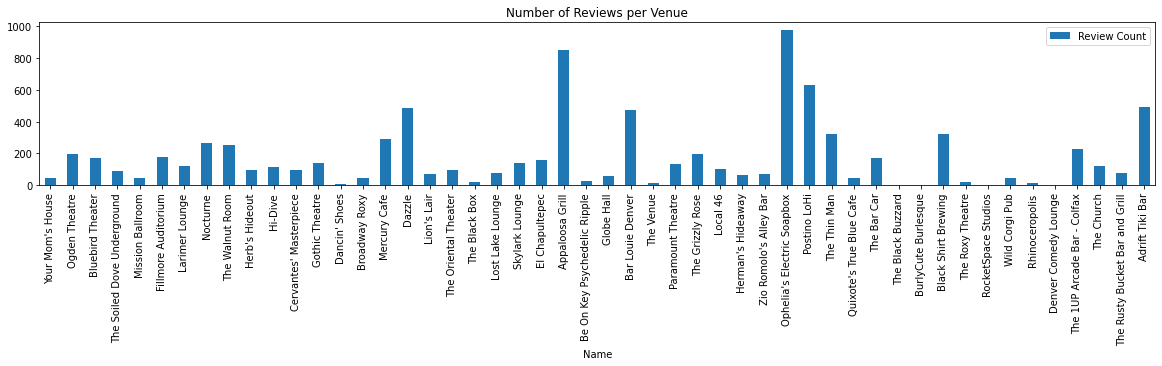

<Figure size 432x288 with 0 Axes>

In [13]:
# Use DataFrame.plot() in order to create a bar chart of the data
review_count.plot(kind="bar", figsize=(20,3))

# Create title for the chart
plt.title("Number of Reviews per Venue")

plt.show()
plt.tight_layout()